## Prediction of marriage probability by year of study (linear and logit model)

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data = {
    "Year of study" : [1, 2, 5, 1, 4, 3, 2, 1, 5, 2, 3, 4, 1, 2,
     5, 4, 3, 1, 4, 5, 2, 5, 3, 4, 3, 2, 5, 1],
    "Marital status": [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
                       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0]    
}


In [43]:
data = pd.DataFrame(data)

In [44]:
X = data['Year of study'].to_numpy().reshape(-1, 1)
y = data['Marital status'].to_numpy().reshape(-1, 1)

## Build linear probability model

In [45]:
model_linear = LinearRegression()
model_linear.fit(X, y)

LinearRegression()

## Build logistic probability model

In [46]:
logit = pd.DataFrame()
logit['Year of study'] = data['Year of study'].unique()
logit = logit.join(data.groupby(by='Year of study').count(), on='Year of study')
logit = logit.rename(columns={'Marital status':'Total students'})
logit = logit.join(data[data['Marital status'] == 1].groupby(by='Year of study').count(), on='Year of study')
logit = logit.rename(columns={'Marital status':'Students married'})
logit['P'] = logit['Students married'] / logit['Total students']
logit['L'] = np.log(logit['P'] / (1 - logit['P']))
logit.head()

,Year of study,Total students,Students married,P,L
0,1,6,1,0.166667,-1.609438
1,2,6,1,0.166667,-1.609438
2,5,6,5,0.833333,1.609438
3,4,5,4,0.800000,1.386294
4,3,5,3,0.600000,0.405465


In [47]:
model_logit = LinearRegression()
model_logit.fit(logit['Year of study'].to_numpy().reshape(-1, 1), logit['L'].to_numpy().reshape(-1, 1))

LinearRegression()

## Compare models 

Text(0, 0.5, 'Probablity of marriage')

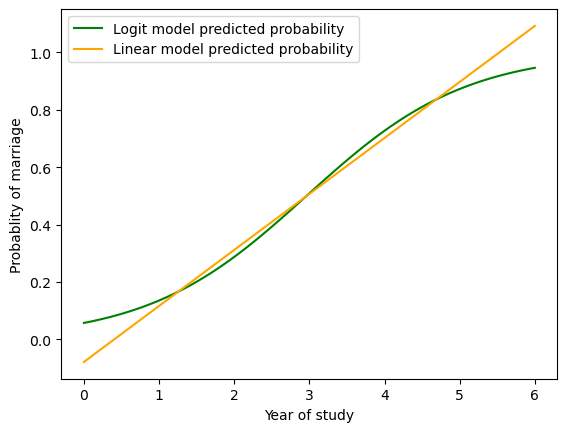

In [48]:
Y_range = np.linspace(
    min(data['Year of study'].to_numpy().reshape(-1, 1)) - 1,
    max(data['Year of study'].to_numpy().reshape(-1, 1)) + 1,
    100).reshape(-1, 1)
b0 = model_logit.intercept_
b1 = model_logit.coef_[0, 0]
P_logit = 1 / (1 + np.exp(-(b0 + b1 * Y_range)))
P_linear = model_linear.predict(Y_range)
plt.plot(Y_range, P_logit, color='green', label='Logit model predicted probability')
plt.plot(Y_range, P_linear, color='orange', label='Linear model predicted probability')
plt.legend()
plt.xlabel('Year of study')
plt.ylabel('Probablity of marriage')